# MSCS 634 - Lab 4: Regression Analysis
**Student Name:** Muluwork Geremew

**Course Title:** MSCS 634 -  Advanced Big Data and Data Mining (MSCS-634-M40).  
**Lab Title:** Regression Analysis with Regularization Techniques 

In [36]:
from sklearn.datasets import load_diabetes
import pandas as pd

# Load the diabetes dataset
diabetes = load_diabetes()

In [37]:
diabetes

{'data': array([[ 0.03807591,  0.05068012,  0.06169621, ..., -0.00259226,
          0.01990749, -0.01764613],
        [-0.00188202, -0.04464164, -0.05147406, ..., -0.03949338,
         -0.06833155, -0.09220405],
        [ 0.08529891,  0.05068012,  0.04445121, ..., -0.00259226,
          0.00286131, -0.02593034],
        ...,
        [ 0.04170844,  0.05068012, -0.01590626, ..., -0.01107952,
         -0.04688253,  0.01549073],
        [-0.04547248, -0.04464164,  0.03906215, ...,  0.02655962,
          0.04452873, -0.02593034],
        [-0.04547248, -0.04464164, -0.0730303 , ..., -0.03949338,
         -0.00422151,  0.00306441]], shape=(442, 10)),
 'target': array([151.,  75., 141., 206., 135.,  97., 138.,  63., 110., 310., 101.,
         69., 179., 185., 118., 171., 166., 144.,  97., 168.,  68.,  49.,
         68., 245., 184., 202., 137.,  85., 131., 283., 129.,  59., 341.,
         87.,  65., 102., 265., 276., 252.,  90., 100.,  55.,  61.,  92.,
        259.,  53., 190., 142.,  75., 142.

In [38]:
X = diabetes["data"]                      # Feature matrix
y = diabetes["target"]                   # Target variable
feature_names = diabetes["feature_names"]
df = pd.DataFrame(X, columns=feature_names)

df["target"] = y

# Display dataset shape
print("Shape of dataset:", df.shape)

# Show first few rows
print("\nFirst 5 rows:")
print(df.head())

# Summary statistics
print("\nSummary statistics:")
print(df.describe())


Shape of dataset: (442, 11)

First 5 rows:
        age       sex       bmi        bp        s1        s2        s3  \
0  0.038076  0.050680  0.061696  0.021872 -0.044223 -0.034821 -0.043401   
1 -0.001882 -0.044642 -0.051474 -0.026328 -0.008449 -0.019163  0.074412   
2  0.085299  0.050680  0.044451 -0.005670 -0.045599 -0.034194 -0.032356   
3 -0.089063 -0.044642 -0.011595 -0.036656  0.012191  0.024991 -0.036038   
4  0.005383 -0.044642 -0.036385  0.021872  0.003935  0.015596  0.008142   

         s4        s5        s6  target  
0 -0.002592  0.019907 -0.017646   151.0  
1 -0.039493 -0.068332 -0.092204    75.0  
2 -0.002592  0.002861 -0.025930   141.0  
3  0.034309  0.022688 -0.009362   206.0  
4 -0.002592 -0.031988 -0.046641   135.0  

Summary statistics:
                age           sex           bmi            bp            s1  \
count  4.420000e+02  4.420000e+02  4.420000e+02  4.420000e+02  4.420000e+02   
mean  -2.511817e-19  1.230790e-17 -2.245564e-16 -4.797570e-17 -1.381499e-17

In [39]:
# Check for missing values
print("\nMissing values in each column:")
print(df.isnull().sum())


Missing values in each column:
age       0
sex       0
bmi       0
bp        0
s1        0
s2        0
s3        0
s4        0
s5        0
s6        0
target    0
dtype: int64


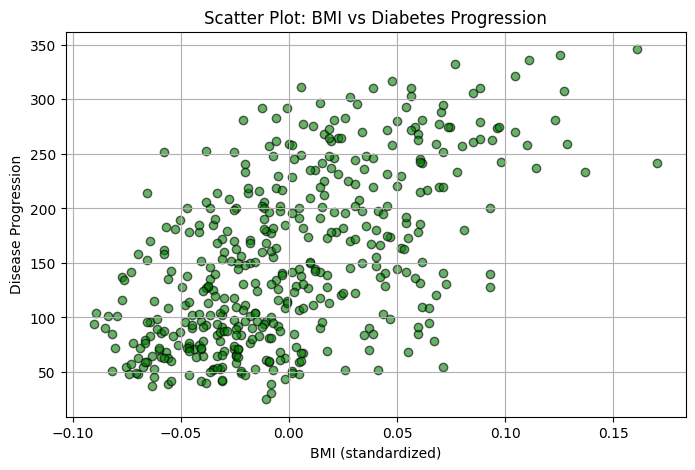

In [40]:
import matplotlib.pyplot as plt

# Scatter plot: bmi vs target
plt.figure(figsize=(8, 5))
plt.scatter(df['bmi'], df['target'], color='green', alpha=0.6, edgecolors='black')
plt.xlabel("BMI (standardized)")
plt.ylabel("Disease Progression")
plt.title("Scatter Plot: BMI vs Diabetes Progression")
plt.grid(True)
plt.show()


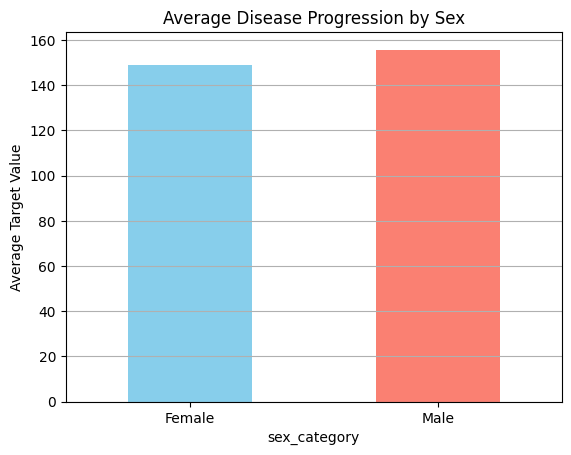

In [41]:
# Create sex categories (approx: >0 = male, <0 = female)
df['sex_category'] = df['sex'].apply(lambda x: 'Male' if x > 0 else 'Female')

# Grouped mean target
sex_group = df.groupby('sex_category')['target'].mean()

# Plot
sex_group.plot(kind='bar', color=['skyblue', 'salmon'])
plt.title("Average Disease Progression by Sex")
plt.ylabel("Average Target Value")
plt.xticks(rotation=0)
plt.grid(axis='y')
plt.show()


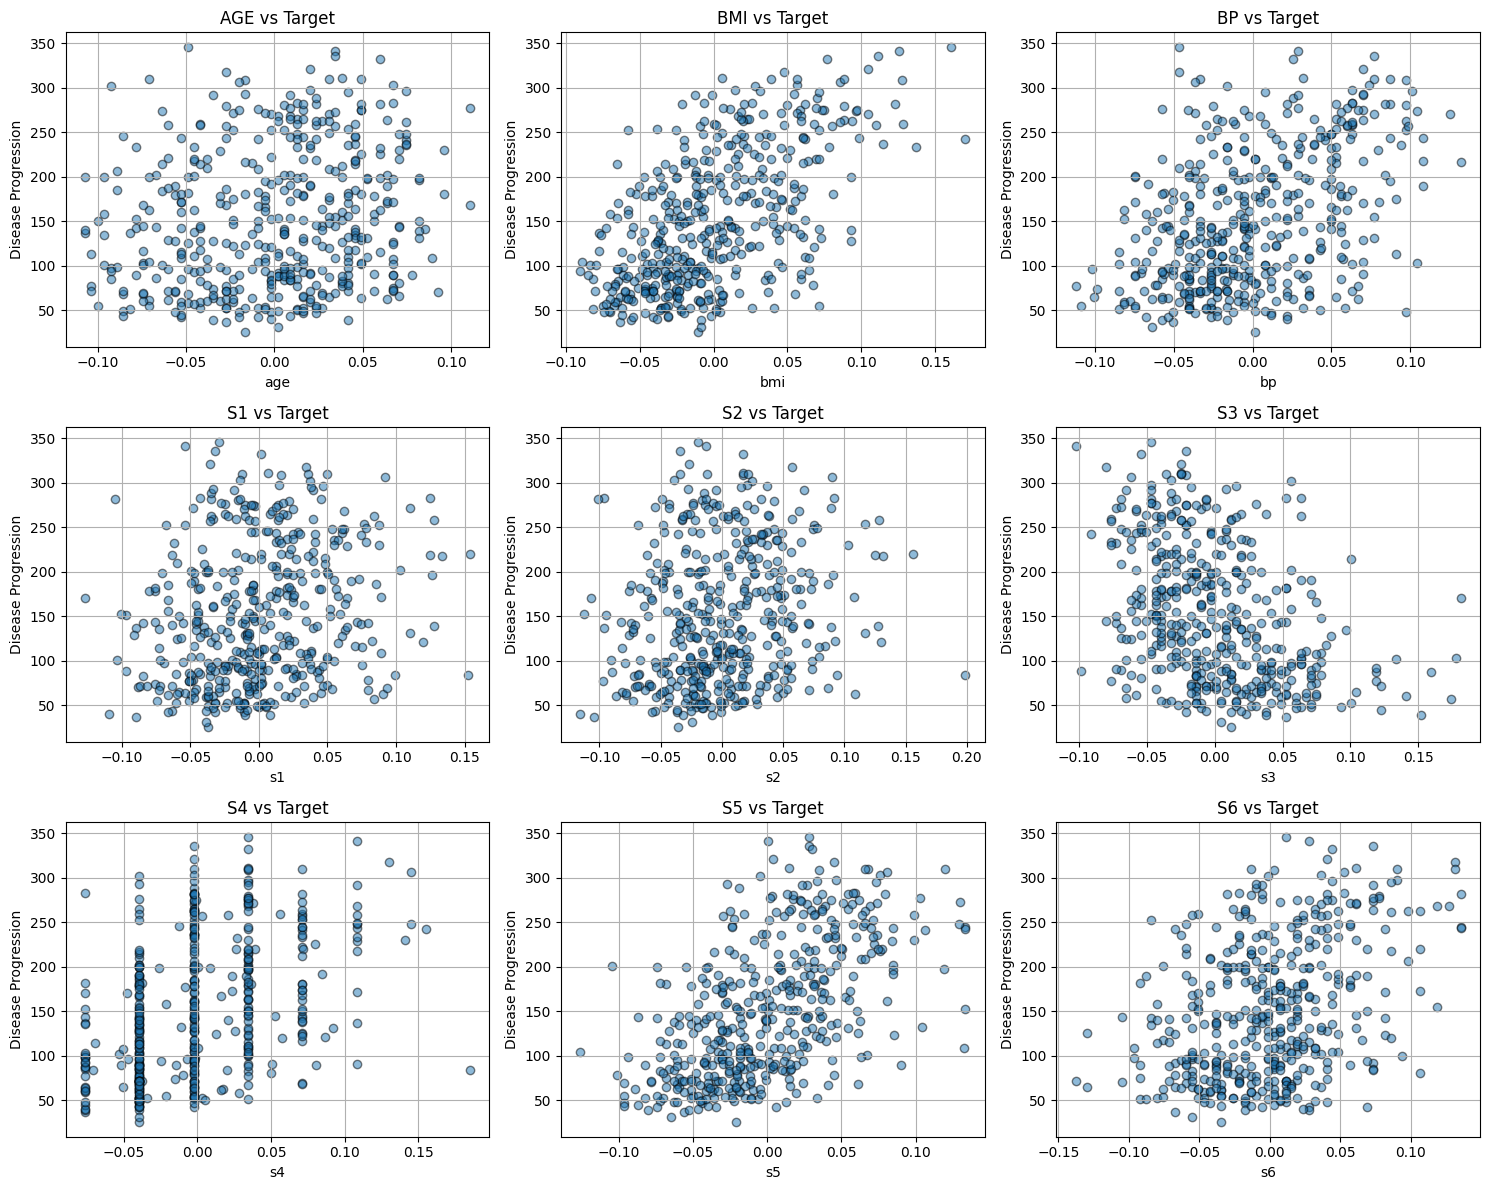

In [42]:
import matplotlib.pyplot as plt

features = ['age', 'bmi', 'bp', 's1', 's2', 's3', 's4', 's5', 's6']
plt.figure(figsize=(15, 12))

for i, feature in enumerate(features):
    plt.subplot(3, 3, i + 1)
    plt.scatter(df[feature], df['target'], alpha=0.5, edgecolor='k')
    plt.title(f'{feature.upper()} vs Target')
    plt.xlabel(feature)
    plt.ylabel('Disease Progression')
    plt.grid(True)

plt.tight_layout()
plt.show()


In [43]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np
import matplotlib.pyplot as plt

# Step 1: Select 'bmi' as the only feature
X_bmi = df[['bmi']]   # shape = (442, 1)
y = df['target']      # shape = (442,)

# Step 2: Split the data
X_train, X_test, y_train, y_test = train_test_split(X_bmi, y, test_size=0.2, random_state=42)

# Step 3: Create and train the model
model = LinearRegression()
model.fit(X_train, y_train)

# Step 4: Predict
y_pred = model.predict(X_test)

# Step 5: Evaluate
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
print(f"R² Score: {r2:.4f}")


Mean Absolute Error (MAE): 52.26
Mean Squared Error (MSE): 4061.83
Root Mean Squared Error (RMSE): 63.73
R² Score: 0.2334


## Step 2: Simple Linear Regression (Using BMI Feature)

### Model Description:
In this step, we implemented a simple linear regression model using **BMI** as the sole independent variable to predict the **target** variable (disease progression).

### Evaluation Metrics:

| Metric | Value | Interpretation |
|--------|-------|----------------|
| **Mean Absolute Error (MAE)**  | 52.26 | On average, predictions are ~52 units away from the actual target|
| **Mean Squared Error (MSE)**   | 4061.83 | Higher error due to squaring deviations|
| **Root Mean Squared Error (RMSE)** | 63.73 | Gives error in original units (comparable to target scale) |
| **R² Score**                   | 0.2334 | Only ~23.3% of the variation in disease progression is explained by bmi alone|

### Interpretation:
- The model explains approximately **23.3% of the variance** in the target variable.
- **BMI** has a positive correlation with disease progression, but it **alone is not sufficient** for strong predictive performance.
- The relatively high **MAE** and **RMSE** indicate prediction errors are significant, supporting the need for more features.

### Next Step:
We will improve the model by implementing **Multiple Linear Regression**, using all available features in the dataset.


In [45]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

# Step 1: Use all features except 'target' and 'sex_category'
X = df.drop(columns=['target', 'sex_category'])  # feature matrix
y = df['target']                                 # target

# Step 2: Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 3: Train the model
multi_model = LinearRegression()
multi_model.fit(X_train, y_train)

# Step 4: Make predictions
y_pred_multi = multi_model.predict(X_test)

# Step 5: Evaluate
mae = mean_absolute_error(y_test, y_pred_multi)
mse = mean_squared_error(y_test, y_pred_multi)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred_multi)

print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
print(f"R² Score: {r2:.4f}")


Mean Absolute Error (MAE): 42.79
Mean Squared Error (MSE): 2900.19
Root Mean Squared Error (RMSE): 53.85
R² Score: 0.4526


## Step 3: Multiple Linear Regression (Using All Features)

### Model Description:
In this step, we implemented a **Multiple Linear Regression** model using **all available features** to predict the target variable (disease progression).

### Evaluation Metrics:

| Metric | Value |
|--------|-------|
| **Mean Absolute Error (MAE)**  | 42.79 |
| **Mean Squared Error (MSE)**   | 2900.19 |
| **Root Mean Squared Error (RMSE)** | 53.85 |
| **R² Score**                   | 0.4526 |

### Interpretation:
- The model now explains approximately **45.3% of the variance** in the target.
- This is a significant improvement over simple linear regression, indicating that combining features captures more of the underlying signal.
- The prediction error is lower, showing the benefit of using **multiple variables** in regression analysis.

### Next Step:
We will implement **Polynomial Regression**, which extends linear regression by including non-linear (squared, interaction) terms.


In [46]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

# Step 1: Generate polynomial features (degree = 2)
poly = PolynomialFeatures(degree=2)
X_poly = poly.fit_transform(X)

# Step 2: Split into train/test
X_train_poly, X_test_poly, y_train_poly, y_test_poly = train_test_split(X_poly, y, test_size=0.2, random_state=42)

# Step 3: Train the model
poly_model = LinearRegression()
poly_model.fit(X_train_poly, y_train_poly)

# Step 4: Predict
y_pred_poly = poly_model.predict(X_test_poly)

# Step 5: Evaluate
mae = mean_absolute_error(y_test_poly, y_pred_poly)
mse = mean_squared_error(y_test_poly, y_pred_poly)
rmse = np.sqrt(mse)
r2 = r2_score(y_test_poly, y_pred_poly)

print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
print(f"R² Score: {r2:.4f}")


Mean Absolute Error (MAE): 43.58
Mean Squared Error (MSE): 3096.03
Root Mean Squared Error (RMSE): 55.64
R² Score: 0.4156


## Step 4: Polynomial Regression (Degree 2)

### Model Description:
Polynomial regression extends linear regression by including **nonlinear relationships** through polynomial terms (squares and feature interactions). In this step, we applied polynomial transformation of **degree 2** to all features, increasing the feature space from 10 to 65.

### Evaluation Metrics:

| Metric | Value |
|--------|-------|
| **Mean Absolute Error (MAE)**  | 43.58 |
| **Mean Squared Error (MSE)**   | 3096.03 |
| **Root Mean Squared Error (RMSE)** | 55.64 |
| **R² Score**                   | 0.4156 |



### Interpretation:
- R² dropped slightly from 0.4526 (multiple regression) → 0.4156.

- Error increased: RMSE went up to 55.64 from 53.85.

- This shows signs of overfitting: the model may be fitting noise in the training data due to added complexity (65 features).

- Polynomial regression can capture non-linear interactions, but without regularization, it can lead to worse generalization.
- Despite adding more complexity, the performance slightly **decreased**, indicating possible **overfitting**.
- Polynomial terms may introduce noise that hurts test accuracy.
- This highlights the need for **regularization techniques** (Ridge and Lasso), which we will explore in the next step.

### Next Step:
Apply **Ridge and Lasso Regression** to control model complexity and improve generalization.


## Step 5: Regularization with Ridge and Lasso Regression

### 🎯 Goal:
The goal of this step is to apply **regularization techniques** to improve model generalization and reduce the risk of **overfitting** introduced by complex models such as polynomial regression.

We will explore two popular regularization methods:

| Model   | Penalty Type     | Objective Function Modification                          |
|---------|------------------|------------------------------------------------------------|
| **Ridge Regression** | L2 Regularization | Adds a penalty on the **square** of the coefficients:<br> \( Loss + alpha sum w^2 \) |
| **Lasso Regression** | L1 Regularization | Adds a penalty on the **absolute value** of the coefficients:<br> \( Loss + alpha sum |w| \) |

### Why Use Regularization?
- Helps to **prevent overfitting** by discouraging overly complex models.
- Controls the magnitude of coefficients, especially when dealing with **many correlated features**.
- **Ridge** tends to shrink coefficients but keeps all features.
- **Lasso** can **eliminate irrelevant features** by setting some weights to zero (feature selection).

In this step, we will apply both Ridge and Lasso regression on the original feature set (not polynomial) and compare the performance against earlier models.


In [47]:
from sklearn.linear_model import Ridge, Lasso

# Ridge Regression
ridge = Ridge(alpha=1.0)
ridge.fit(X_train, y_train)
y_pred_ridge = ridge.predict(X_test)

# Lasso Regression
lasso = Lasso(alpha=0.1)  # lower alpha to avoid underfitting
lasso.fit(X_train, y_train)
y_pred_lasso = lasso.predict(X_test)

# Evaluation
ridge_mae = mean_absolute_error(y_test, y_pred_ridge)
ridge_mse = mean_squared_error(y_test, y_pred_ridge)
ridge_rmse = np.sqrt(ridge_mse)
ridge_r2 = r2_score(y_test, y_pred_ridge)

lasso_mae = mean_absolute_error(y_test, y_pred_lasso)
lasso_mse = mean_squared_error(y_test, y_pred_lasso)
lasso_rmse = np.sqrt(lasso_mse)
lasso_r2 = r2_score(y_test, y_pred_lasso)

print("🔹 Ridge Regression:")
print(f"  MAE:  {ridge_mae:.2f}")
print(f"  MSE:  {ridge_mse:.2f}")
print(f"  RMSE: {ridge_rmse:.2f}")
print(f"  R²:   {ridge_r2:.4f}\n")

print("🔹 Lasso Regression:")
print(f"  MAE:  {lasso_mae:.2f}")
print(f"  MSE:  {lasso_mse:.2f}")
print(f"  RMSE: {lasso_rmse:.2f}")
print(f"  R²:   {lasso_r2:.4f}")


🔹 Ridge Regression:
  MAE:  46.14
  MSE:  3077.42
  RMSE: 55.47
  R²:   0.4192

🔹 Lasso Regression:
  MAE:  42.85
  MSE:  2798.19
  RMSE: 52.90
  R²:   0.4719


## Step 5: Regularization with Ridge and Lasso Regression

### Model Descriptions:
In this step, we applied **Ridge (L2)** and **Lasso (L1)** regression to the original feature set to prevent overfitting and improve model performance.

### Evaluation Metrics:

| Model             | MAE    | MSE     | RMSE   | R² Score |
|------------------|--------|---------|--------|----------|
| **Ridge**        | 46.14  | 3077.42 | 55.47  | 0.4192   |
| **Lasso**        | 42.85  | 2798.19 | 52.90  | 0.4719   |

### Interpretation:
- **Lasso Regression** achieved the **best performance** overall, with the highest R² and lowest error values.
- Ridge helped mitigate overfitting compared to Polynomial Regression, but did not outperform Lasso.
- Lasso's ability to **perform feature selection** may have contributed to its superior generalization.
- This step demonstrates the power of **regularization** in regression tasks with many correlated predictors.

### Next Step:
Summarize all models and compare their performance.


## Step 6: Model Comparison and Analysis

### Summary of Model Performance

| Model                   | MAE    | MSE     | RMSE   | R² Score |
|------------------------|--------|---------|--------|----------|
| Simple Linear (BMI)    | 52.26  | 4061.83 | 63.73  | 0.2334   |
| Multiple Linear         | 42.79  | 2900.19 | 53.85  | 0.4526   |
| Polynomial (Degree = 2) | 43.58  | 3096.03 | 55.64  | 0.4156   |
| Ridge Regression        | 46.14  | 3077.42 | 55.47  | 0.4192   |
| Lasso Regression        | 42.85  | 2798.19 | 52.90  | 0.4719   |


### Key Observations:

- **Lasso Regression** provided the best overall performance, with the highest R² (47.19%) and lowest RMSE.
- **Simple Linear Regression** with just `bmi` explained only ~23% of the variance, confirming it's not sufficient alone.
- **Multiple Linear Regression** significantly improved performance, showing that multiple features are necessary.
- **Polynomial Regression** increased complexity but didn't improve performance — indicating mild overfitting.
- **Ridge and Lasso** helped manage model complexity; **Lasso** also likely removed irrelevant features, improving generalization.


### Final Conclusion:

This lab demonstrated how different regression techniques — including **linear**, **polynomial**, and **regularized models** — perform on the Diabetes dataset. Key takeaways include:

- The value of using **multiple features** over a single one.
- The risk of **overfitting** when adding complexity (e.g., polynomial terms).
- The power of **regularization** in improving model performance and preventing overfitting.
- **Lasso Regression** emerged as the best approach for this dataset.

This practical comparison deepens understanding of model selection, evaluation, and tuning in real-world regression tasks.
